# Task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.rcParams["figure.figsize"] = (15,8)

def get_brightness(R: int, G: int, B: int) -> int:
    return 0.222 * R + 0.707 * G + 0.071 * B

In [2]:
colors = {
    0: np.array([0, 0, 0]),
    1: np.array([255, 0, 0]),
    2: np.array([0, 255, 0]),
    3: np.array([0, 0, 255]),
    4: np.array([255, 255, 255]),
    5: np.array([255, 255, 0]),
    6: np.array([255, 0, 255]),
    7: np.array([0, 255, 255]),
    8: np.array([255, 0, 128]),
    9: np.array([255, 0, 64]),
}

colors_brightness = {}
brightness = []

for key, value in colors.items():
    colors_brightness[key] = get_brightness(*value)

for key in range(1, 5):
    brightness.append(colors_brightness[key])

brightness = np.array(brightness)

In [3]:
desk = np.array([[3, 3, 3, 3, 3, 3, 3, 3],
                 [2, 1, 4, 1, 4, 1, 4, 2],
                 [2, 4, 1, 4, 1, 4, 1, 2],
                 [2, 1, 4, 1, 4, 1, 4, 2],
                 [2, 4, 1, 4, 1, 4, 1, 2],
                 [2, 1, 4, 1, 4, 1, 4, 2],
                 [2, 4, 1, 4, 1, 4, 1, 2],
                 [3, 3, 3, 3, 3, 3, 3, 3]])

desk_colors = np.empty((desk.shape[0], desk.shape[1], 3))

for i in range(desk.shape[0]):
    for j in range(desk.shape[1]):
        desk_colors[i,j] = colors.get(desk[i,j])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


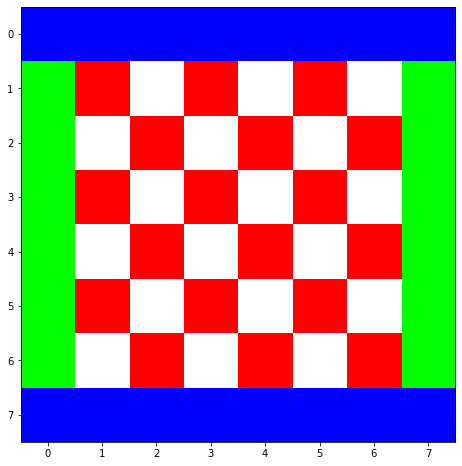

In [4]:
plt.imshow(desk_colors)
plt.show()

## Бинарное преобразование

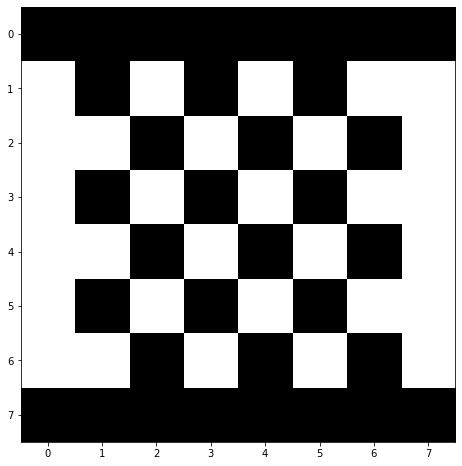

In [5]:
def binary_treshholding(image, trashholding = 1):
    Y = 0.222 * image[..., 0] + 0.707 * image[..., 1] + 0.071 * image[..., 2]
    mean = Y.mean() * trashholding
    mask = np.where(Y >= mean, 255, 0)

    return mask


plt.imshow(binary_treshholding(desk_colors), cmap='gray')
plt.show()

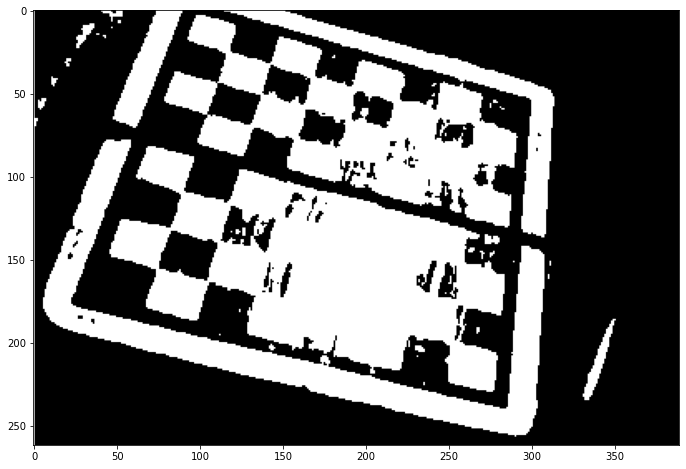

In [6]:
import cv2

img = cv2.imread('data/test.png')
plt.imshow(binary_treshholding(img, trashholding=1.2), cmap='gray')

## Адаптивное преобразование

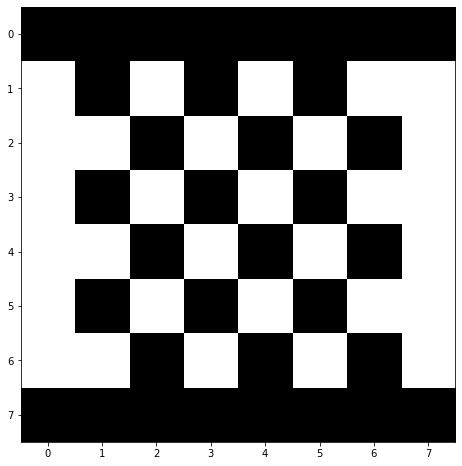

In [7]:
def adaptive_trasholding(image, kernel = (3, 3)):
    height, width = image.shape[:2]
    Y = 0.222 * image[..., 0] + 0.707 * image[..., 1] + 0.071 * image[..., 2]
    k_rows, k_cols = kernel
    padding_rows = ((k_rows - 1) // 2)
    padding_cols = ((k_cols - 1) // 2)
    padding_image = np.zeros([height + 2 * padding_rows, width + 2 * padding_cols])
    padding_image[padding_rows: height + padding_rows, padding_cols: width + padding_cols] = Y

    for y in range(height):
        for x in range(width):
            x_kernel = padding_cols + x
            y_kernel = padding_rows + y

            adaptive_th = padding_image[y_kernel - padding_rows: y_kernel + padding_rows + 1,
                                        x_kernel - padding_cols: x_kernel + padding_cols + 1]
            
            adaptive_th = adaptive_th.mean()
            
            if adaptive_th > Y[y, x]:
                Y[y, x] = 0
            else:
                Y[y, x] = 255
            
    return Y
            

plt.imshow(adaptive_trasholding(desk_colors), cmap='gray')

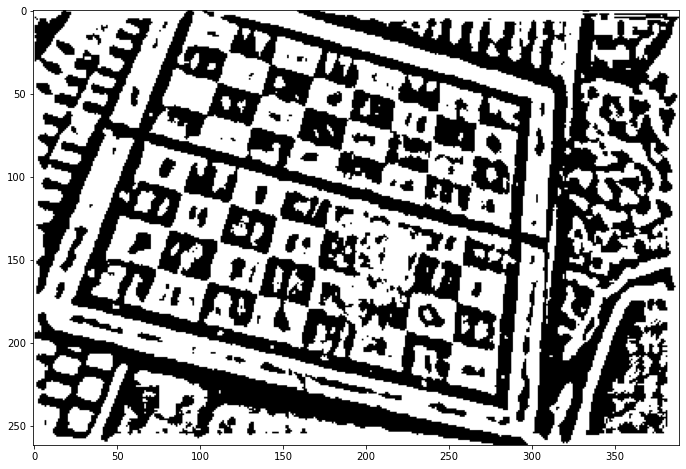

In [8]:
img = cv2.imread('data/test.png')
plt.imshow(adaptive_trasholding(img, kernel = (15, 15)), cmap='gray')

# Task 2

In [9]:
def mean_filter(image: np.ndarray, w: int = 1) -> np.ndarray:
    result = image
    for i in range(w, image.shape[0] - w):
        for j in range(w, image.shape[1] - w):
            block = image[i-w:i+w+1, j-w:j+w+1]
            m = np.mean(block, dtype=np.float64)
            result[i][j] = m
    
    return result

matrix = np.array([[1, 2, 3, 2, 1],
                   [2, 4, 5, 4, 2],
                   [3, 7, 12, 7, 3],
                   [2, 4, 5, 4, 2],
                   [1, 2, 3, 2, 1],])

mean_filter(image=matrix, w = 1)

array([[1, 2, 3, 2, 1],
       [2, 4, 5, 4, 2],
       [3, 4, 5, 4, 3],
       [2, 3, 3, 3, 2],
       [1, 2, 3, 2, 1]])

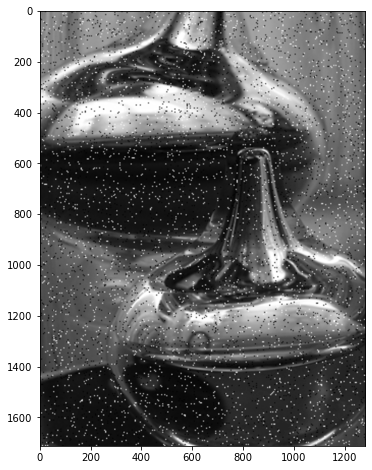

In [10]:
img = cv2.imread('data/Noise_salt_and_pepper.png', 0)
plt.imshow(img, cmap='gray')

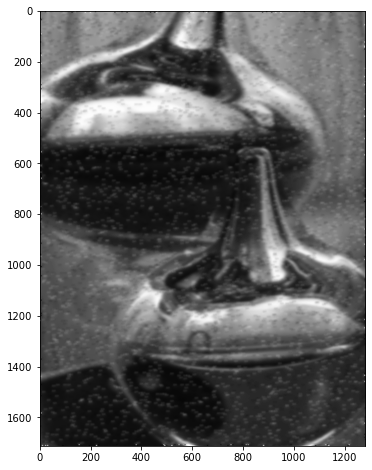

In [11]:
img_filtered = mean_filter(img, w=7)
plt.imshow(img_filtered, cmap='gray')

In [12]:
def median_filter(image: np.ndarray, w: int = 1) -> np.ndarray:
    result = image
    for i in range(w, image.shape[0] - w):
        for j in range(w, image.shape[1] - w):
            block = image[i-w:i+w+1, j-w:j+w+1]
            m = np.median(block)
            result[i][j] = m
    
    return result

matrix = np.array([[123, 125, 126, 130, 149],
                   [122, 124, 126, 127, 135],
                   [118, 120, 150, 125, 134],
                   [119, 115, 119, 123, 133],
                   [111, 116, 119, 120, 130],])

median_filter(image=matrix, w=1)

array([[123, 125, 126, 130, 149],
       [122, 124, 126, 130, 135],
       [118, 120, 124, 126, 134],
       [119, 119, 120, 124, 133],
       [111, 116, 119, 120, 130]])

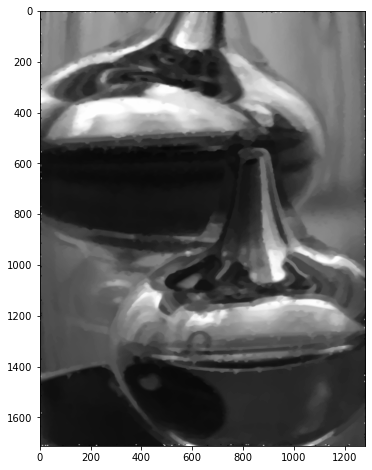

In [13]:
img = cv2.imread('data/Noise_salt_and_pepper.png', 0)
img_filtered = median_filter(img, w=7)
plt.imshow(img_filtered, cmap='gray')

# Task 3

In [14]:
def rotation(img, angle):
    angle = angle * np.pi / 180

    first_matrix = np.array([
        [1, -np.tan(angle)/2],
        [0, 1]
    ])
    second_matrix = np.array([
        [1, 0],
        [np.sin(angle), 1]
    ])

    height, width = img.shape[0], img.shape[1]
    result = np.zeros([height + 1, width + 1])
    for i in range(height):
        for j in range(width):
            coord = np.dot(first_matrix, np.array([j, i]))
            coord = np.dot(second_matrix, coord)
            coord = np.dot(first_matrix, coord)

            if (coord[0] > 0 and int(coord[0]) < width and
                coord[1] > 0 and int(coord[1]) < height):
                result[i, j] = img[int(coord[1]), int(coord[0])]

    return result

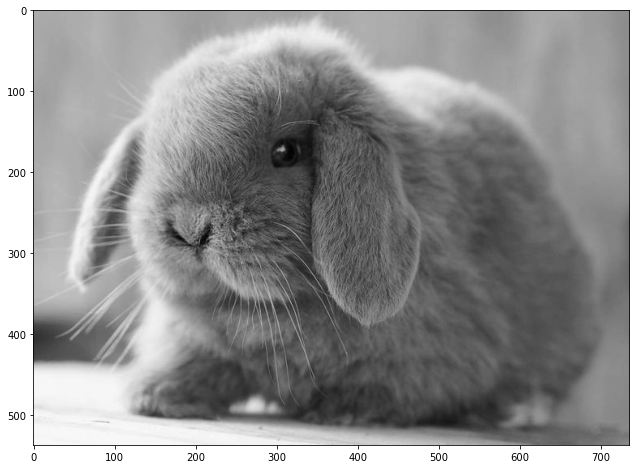

In [15]:
img = cv2.imread('data/rabbit.jpg', 0)
plt.imshow(img, cmap='gray')

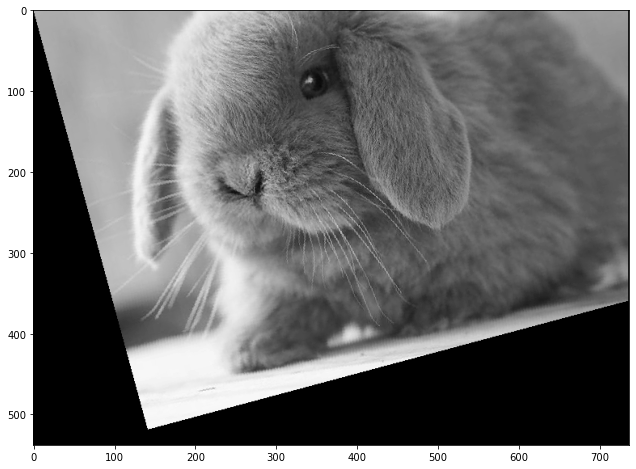

In [16]:
plt.imshow(rotation(img, 15), cmap='gray')